# 초기 모형 
- (date_diff 까지 구해 준 데이터 사용)

In [326]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve, auc
from imblearn.under_sampling import *

In [367]:
df.tail()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Scheduled_date,Scheduled_time,Appointment_date,date_diff
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No,2016-05-03,09:15:35,2016-06-07,35
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No,2016-05-03,07:27:33,2016-06-07,35
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No,2016-04-27,16:03:52,2016-06-07,41
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No,2016-04-27,15:09:23,2016-06-07,41
110526,3.775115e+14,5629448,F,2016-04-27T13:30:56Z,2016-06-07T00:00:00Z,54,MARIA ORTIZ,0,0,0,0,0,1,No,2016-04-27,13:30:56,2016-06-07,41


In [380]:
initial_df_X = df.drop(["PatientId", "AppointmentID", "ScheduledDay", "AppointmentDay", "Scheduled_date", "Scheduled_time", "Appointment_date", "No-show"], axis=1)

In [381]:
initial_df_y = df["No-show"]

In [382]:
initial_df_X = pd.get_dummies(initial_df_X, drop_first=True)

In [388]:
initial_train_X, initial_test_X, initial_train_y, initial_test_y = train_test_split(initial_df_X, initial_df_y, test_size=0.3, random_state=0, stratify=initial_df_y)

In [390]:
model_sk = LogisticRegression().fit(initial_train_X, initial_train_y)

In [392]:
y_pred = model_sk.predict(initial_test_X)

In [393]:
confusion_matrix(initial_test_y, y_pred, labels=["Yes", "No"])

array([[   93,  6601],
       [  209, 26254]])

In [394]:
print(classification_report(initial_test_y, y_pred))

              precision    recall  f1-score   support

          No       0.80      0.99      0.89     26463
         Yes       0.31      0.01      0.03      6694

   micro avg       0.79      0.79      0.79     33157
   macro avg       0.55      0.50      0.46     33157
weighted avg       0.70      0.79      0.71     33157



# Logistic Regression

In [336]:
X_samp, y_samp = EditedNearestNeighbours(kind_sel="all", n_neighbors=5, random_state=0).fit_sample(X_train, y_train)

In [337]:
model_sk = LogisticRegression().fit(X_samp, y_samp)

In [349]:
# y_pred = model_sk.predict(X_test)
# set thresholds 0.3
y_pred = ["Yes" if x else "No" for x in (model_sk.predict_proba(X_test)[:,1] >= 0.4)]

In [350]:
y_pred = model_sk.predict(X_test)

In [351]:
confusion_matrix(y_test, y_pred, labels=["Yes", "No"])

array([[ 4966,  1728],
       [11051, 15411]])

In [359]:
recall = 4966 / (4966 + 1728)
fallout = 11051 / (11051 + 15411)

In [360]:
print(classification_report(y_test, y_pred ))

              precision    recall  f1-score   support

          No       0.90      0.58      0.71     26462
         Yes       0.31      0.74      0.44      6694

   micro avg       0.61      0.61      0.61     33156
   macro avg       0.60      0.66      0.57     33156
weighted avg       0.78      0.61      0.65     33156



In [361]:
accuracy_score(y_test, y_pred)

0.6145795632766317

### ROC Curve

In [362]:
fpr, tpr, thresholds = roc_curve(y_test, model_sk.decision_function(X_test), pos_label="Yes")
fpr, tpr, thresholds

(array([0.00000000e+00, 0.00000000e+00, 7.55800771e-05, ...,
        9.99508729e-01, 9.99508729e-01, 1.00000000e+00]),
 array([0.00000000e+00, 1.49387511e-04, 1.49387511e-04, ...,
        9.99701225e-01, 1.00000000e+00, 1.00000000e+00]),
 array([ 4.37220931,  3.37220931,  2.79245758, ..., -3.43486217,
        -3.43897506, -4.05768473]))

In [366]:
y_hat = model_sk.predict(X_test)
f_value = model_sk.decision_function(X_test)

df1 = pd.DataFrame(np.vstack([f_value, y_hat, y_test]).T,
                  columns=["f", "y_hat", "y"])
df1.sort_values("f", ascending=False).reset_index(drop=True).tail()

,f,y_hat,y
33151,-3.61356,No,No
33152,-3.61942,No,No
33153,-3.62773,No,No
33154,-3.6562,No,No
33155,-4.05768,No,No


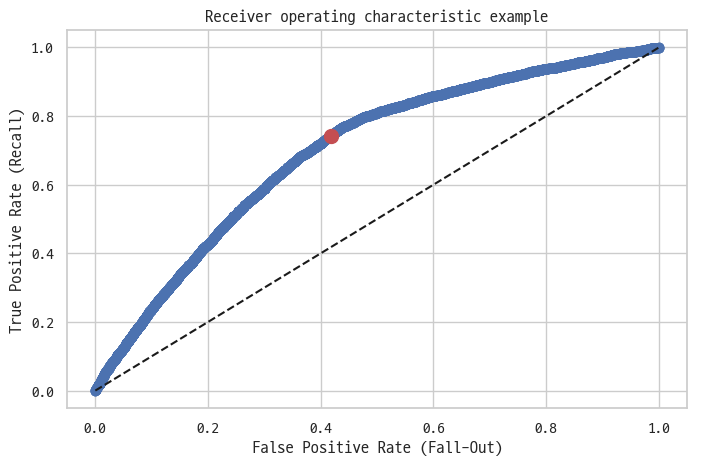

In [364]:
plt.plot(fpr, tpr, 'o-', label="Logistic Regression")
plt.plot([0, 1], [0, 1], 'k--', label="random guess")
plt.plot([fallout], [recall], 'ro', ms=10)
plt.xlabel('False Positive Rate (Fall-Out)')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Receiver operating characteristic example')
plt.show()

### AUC

In [365]:
auc(fpr, tpr)

0.697356861732741